In [ ]:
# Example usage: Extract binary frequencies from validation set
binary_freq_dict = get_binary_latent_frequencies(my_model, val_loader, device)

# Analyze and visualize the results
sorted_states = analyze_binary_frequencies(binary_freq_dict, top_k=15)

# Initialize

In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import torch
from torchvision import datasets, transforms
import numpy as np
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from torch import nn
import matplotlib.pyplot as plt


from AE.models import AE_0
from AE.train import train
from AE.datasets import MNISTDigit2Dataset


In [3]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Utilizzo Apple Silicon GPU (MPS)")
elif torch.cuda.is_available():
    device = torch.device("cuda")
    print("Utilizzo NVIDIA GPU (CUDA)")
else:
    device = torch.device("cpu")
    print("Utilizzo la CPU")

device = torch.device("cpu")  # Fallback to CPU if no GPU is available

SEED = 42
torch.manual_seed(SEED)

Utilizzo Apple Silicon GPU (MPS)


# Datasets


In [4]:
batch_size = 64

## MNIST


In [5]:
train_loader_MNIST = torch.utils.data.DataLoader(
    datasets.MNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        train=True,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=batch_size,
    shuffle=True
    )

val_loader_MNIST = torch.utils.data.DataLoader(
    datasets.MNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        train=False,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=batch_size,
    shuffle=False
    )


## ExtendedMNIST


In [11]:
train_loader_EMNIST = torch.utils.data.DataLoader(
    datasets.EMNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        split='balanced',
        train=True,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=batch_size,
    shuffle=True
    )

val_loader_EMNIST = torch.utils.data.DataLoader(
    datasets.EMNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        split='balanced',
        train=False,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=batch_size,
    shuffle=False
    )


## train over 2MNIST


In [7]:
dataset_2MNIST_train = MNISTDigit2Dataset(train=True, download=True, target_size=60000)
print(f"Dataset size: {len(dataset_2MNIST_train)}")
print(f"Image shape: {dataset_2MNIST_train[0][0].shape}")
print(f"Label: {dataset_2MNIST_train[0][1]}")
train_loader_2MNIST = DataLoader(dataset_2MNIST_train, batch_size=batch_size, shuffle=True)

batch_images, batch_labels = next(iter(train_loader_2MNIST))
print(f"Batch images shape: {batch_images.shape}")
print(f"Batch labels shape: {batch_labels.shape}")
print(f"All labels are 2: {torch.all(batch_labels == 2)}")

print("\n––––––––––––––––––––––––––––––––––––––––––––––––––––––\n")

dataset_2MNIST_val = MNISTDigit2Dataset(train=False, download=True, target_size=10000)
print(f"Dataset size: {len(dataset_2MNIST_train)}")
print(f"Image shape: {dataset_2MNIST_train[0][0].shape}")
print(f"Label: {dataset_2MNIST_train[0][1]}")
print(f"All labels are 2: {torch.all(batch_labels == 2)}")
val_loader_2MNIST = DataLoader(dataset_2MNIST_val, batch_size=batch_size, shuffle=True)

print(f"Batch images shape: {batch_images.shape}")
print(f"Batch labels shape: {batch_labels.shape}")
print(f"All labels are 2: {torch.all(batch_labels == 2)}")


Found 5958 original samples of digit '2'
Generated 60000 augmented samples
Dataset size: 60000
Image shape: torch.Size([1, 28, 28])
Label: 2
Batch images shape: torch.Size([64, 1, 28, 28])
Batch labels shape: torch.Size([64])
All labels are 2: True

––––––––––––––––––––––––––––––––––––––––––––––––––––––

Generated 60000 augmented samples
Dataset size: 60000
Image shape: torch.Size([1, 28, 28])
Label: 2
Batch images shape: torch.Size([64, 1, 28, 28])
Batch labels shape: torch.Size([64])
All labels are 2: True

––––––––––––––––––––––––––––––––––––––––––––––––––––––

Found 1032 original samples of digit '2'
Generated 10000 augmented samples
Dataset size: 60000
Image shape: torch.Size([1, 28, 28])
Label: 2
All labels are 2: True
Batch images shape: torch.Size([64, 1, 28, 28])
Batch labels shape: torch.Size([64])
All labels are 2: True
Found 1032 original samples of digit '2'
Generated 10000 augmented samples
Dataset size: 60000
Image shape: torch.Size([1, 28, 28])
Label: 2
All labels are 2

## train over FashionMNIST


In [19]:
train_loader_FashionMNIST = torch.utils.data.DataLoader(
    datasets.FashionMNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        train=True,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=batch_size,
    shuffle=True
    )

val_loader_FashionMNIST = torch.utils.data.DataLoader(
    datasets.FashionMNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        train=False,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=batch_size,
    shuffle=False
    )


## OTHERS

In [ ]:
## train over pureHFM
dataset_HFM_train = Dataset_pureHFM(csv_file='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/pureHFM/512features/glog2_train60000.pt',
                        root_dir='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/pureHFM')

train_loader_pureHFM = DataLoader(
    dataset_HFM_train,
    batch_size=md.batch_size,
    shuffle=True
)

dataset_HFM_val = Dataset_pureHFM(csv_file='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/pureHFM/512features/glog2_validation10000.pt',
                            root_dir='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/pureHFM')

val_loader_pureHFM = DataLoader(
    dataset_HFM_val, # Importante: usa dataset_HFM_val qui, non dataset_HFM
    batch_size=md.batch_size,
    shuffle=False
)
## train over expandedHFM
dataset_HFM_train = Dataset_HFM(csv_file='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/expandedHFM/16_1024features/2hl_glog2_train60000.pt',
                        root_dir='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/pureHFM')

train_loader_expandedHFM = DataLoader(
    dataset_HFM_train,
    batch_size=md.batch_size,
    shuffle=True
)

dataset_HFM_val = Dataset_HFM(csv_file='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/expandedHFM/16_1024features/2hl_glog2_validation10000.pt',
                            root_dir='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/pureHFM')

val_loader_expandedHFM = DataLoader(
    dataset_HFM_val, # Importante: usa dataset_HFM_val qui, non dataset_HFM
    batch_size=md.batch_size,
    shuffle=False
)
## train over expandedHFM 32-1024
dataset_HFM_train = Dataset_HFM(csv_file='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/expandedHFM/32_1024features/2hl_glog2_train60000.pt',
                        root_dir='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/pureHFM')

train_loader_expandedHFM_32_1024 = DataLoader(
    dataset_HFM_train,
    batch_size=md.batch_size,
    shuffle=True
)

dataset_HFM_val = Dataset_HFM(csv_file='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/expandedHFM/32_1024features/2hl_glog2_validation10000.pt',
                            root_dir='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/pureHFM')

val_loader_expandedHFM_32_1024 = DataLoader(
    dataset_HFM_val, # Importante: usa dataset_HFM_val qui, non dataset_HFM
    batch_size=md.batch_size,
    shuffle=False
)

# Autoencoders model 0

In [8]:
learning_rate = 1e-3
weight_decay = 1e-5


## EMNIST

In [12]:
train_loader = train_loader_EMNIST
val_loader = val_loader_EMNIST
input_dim = 784


### 8 features

In [14]:
my_model = AE_0(input_dim=input_dim, latent_dim=8, decrease_rate=0.5, device=device, hidden_layers=1, output_activation_encoder=nn.Sigmoid).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders/models/EMNIST/ld8_ep15_dr05_1hl.pth', map_location=my_model.device))

<All keys matched successfully>

In [22]:
writer = SummaryWriter(log_dir='/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders/runs/EMNIST/ld8_ep15_dr05_1hl')
my_model = AE_0(input_dim=input_dim, latent_dim=8, decrease_rate=0.5, device=device, hidden_layers=1, output_activation_encoder=nn.Sigmoid).to(device)
optimizer = optim.Adam(my_model.parameters(), lr=learning_rate, weight_decay=weight_decay)
train(my_model, writer=writer, train_loader=train_loader, val_loader=val_loader, optimizer=optimizer, epochs=15)
torch.save(my_model.state_dict(), '/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders/models/EMNIST/ld8_ep15_dr05_1hl.pth')

Epoch: 0/15, Average loss: 0.0007
Epoch: 1/15, Average loss: 0.0006
Epoch: 1/15, Average loss: 0.0006
Epoch: 2/15, Average loss: 0.0006
Epoch: 2/15, Average loss: 0.0006
Epoch: 3/15, Average loss: 0.0006
Epoch: 3/15, Average loss: 0.0006
Epoch: 4/15, Average loss: 0.0006
Epoch: 4/15, Average loss: 0.0006
Epoch: 5/15, Average loss: 0.0006
Epoch: 5/15, Average loss: 0.0006
Epoch: 6/15, Average loss: 0.0006
Epoch: 6/15, Average loss: 0.0006
Epoch: 7/15, Average loss: 0.0006
Epoch: 7/15, Average loss: 0.0006
Epoch: 8/15, Average loss: 0.0006
Epoch: 8/15, Average loss: 0.0006
Epoch: 9/15, Average loss: 0.0006
Epoch: 9/15, Average loss: 0.0006
Epoch: 10/15, Average loss: 0.0006
Epoch: 10/15, Average loss: 0.0006
Epoch: 11/15, Average loss: 0.0006
Epoch: 11/15, Average loss: 0.0006
Epoch: 12/15, Average loss: 0.0006
Epoch: 12/15, Average loss: 0.0006
Epoch: 13/15, Average loss: 0.0006
Epoch: 13/15, Average loss: 0.0006
Epoch: 14/15, Average loss: 0.0006
Epoch: 14/15, Average loss: 0.0006
Trai

In [18]:
writer = SummaryWriter(log_dir='/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders/runs/EMNIST/ld8_ep15_dr05_1hl_1')
my_model = AE_0(input_dim=input_dim, latent_dim=8, decrease_rate=0.5, device=device, hidden_layers=1).to(device)
optimizer = optim.Adam(my_model.parameters(), lr=learning_rate, weight_decay=weight_decay)
train(my_model, writer=writer, train_loader=train_loader, val_loader=val_loader, optimizer=optimizer, epochs=15)
torch.save(my_model.state_dict(), '/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders/models/EMNIST/ld8_ep15_dr05_1hl_1.pth')

Epoch: 0/15, Average loss: 0.0006
Epoch: 1/15, Average loss: 0.0005
Epoch: 1/15, Average loss: 0.0005
Epoch: 2/15, Average loss: 0.0005
Epoch: 2/15, Average loss: 0.0005
Epoch: 3/15, Average loss: 0.0005
Epoch: 3/15, Average loss: 0.0005
Epoch: 4/15, Average loss: 0.0005
Epoch: 4/15, Average loss: 0.0005
Epoch: 5/15, Average loss: 0.0005
Epoch: 5/15, Average loss: 0.0005
Epoch: 6/15, Average loss: 0.0005
Epoch: 6/15, Average loss: 0.0005
Epoch: 7/15, Average loss: 0.0005
Epoch: 7/15, Average loss: 0.0005
Epoch: 8/15, Average loss: 0.0005
Epoch: 8/15, Average loss: 0.0005
Epoch: 9/15, Average loss: 0.0005
Epoch: 9/15, Average loss: 0.0005
Epoch: 10/15, Average loss: 0.0005
Epoch: 10/15, Average loss: 0.0005
Epoch: 11/15, Average loss: 0.0005
Epoch: 11/15, Average loss: 0.0005
Epoch: 12/15, Average loss: 0.0005
Epoch: 12/15, Average loss: 0.0005
Epoch: 13/15, Average loss: 0.0005
Epoch: 13/15, Average loss: 0.0005
Epoch: 14/15, Average loss: 0.0005
Epoch: 14/15, Average loss: 0.0005
Trai

# Get empirical latent distribution

In [ ]:
def get_empirical_latent_distribution(model, dataloader):

    model.eval()
    device = model.device
    latent_vectors = []
    total_samples = 0

    with torch.no_grad():
        for databatch, _ in dataloader:
            dat_batch = databatch.to(device)
            latent = model.encode(dat_batch.view(dat_batch.size(0), -1))
            latent_vectors.append(latent.cpu().numpy())
            total_samples += dat_batch.size(0)

In [ ]:
from 

In [57]:
def get_binary_latent_frequencies(model, dataloader):
    """
    Extracts binary internal representations from the autoencoder and counts their frequencies.
    
    Args:
        model: The autoencoder model with sigmoid activation before bottleneck
        dataloader: DataLoader containing the dataset
        device: Device to run computations on
    
    Returns:
        dict: Dictionary where keys are binary state tuples and values are frequencies
    """
    import torch

    
    model.eval()
    device = model.device
    state_counts = defaultdict(int)
    total_samples = 0
    
    with torch.no_grad():
        for batch_data, _ in dataloader:
            batch_data = batch_data.to(device)
            
            # Encode to get latent representations (after sigmoid)
            latent_vectors = model.encode(batch_data.view(batch_data.size(0), -1))
            
            # Convert to binary: < 0.5 → 0, >= 0.5 → 1
            binary_states = (latent_vectors >= 0.5).int()
            
            # Convert each binary vector to tuple (hashable for dictionary keys)
            for i in range(binary_states.size(0)):
                state_tuple = tuple(binary_states[i].cpu().numpy())
                state_counts[state_tuple] += 1
                total_samples += 1

    # Normalize frequencies by total_samples
    frequency_dict = {k: v / total_samples for k, v in state_counts.items()}

    
    print(f"Total samples processed: {total_samples}")
    print(f"Number of unique binary states found: {len(frequency_dict)}")
    print(f"Theoretical maximum states for {model.latent_dim}-dim latent: {2**model.latent_dim}")
    
    return frequency_dict

In [43]:
get_binary_latent_frequencies(my_model, val_loader)

Total samples processed: 18800
Number of unique binary states found: 256
Theoretical maximum states for 8-dim latent: 256


{(np.int32(0),
  np.int32(1),
  np.int32(0),
  np.int32(0),
  np.int32(1),
  np.int32(1),
  np.int32(1),
  np.int32(1)): 0.0027659574468085106,
 (np.int32(1),
  np.int32(0),
  np.int32(0),
  np.int32(1),
  np.int32(0),
  np.int32(1),
  np.int32(1),
  np.int32(0)): 0.0075,
 (np.int32(1),
  np.int32(1),
  np.int32(0),
  np.int32(0),
  np.int32(1),
  np.int32(0),
  np.int32(0),
  np.int32(1)): 0.008297872340425531,
 (np.int32(1),
  np.int32(0),
  np.int32(0),
  np.int32(0),
  np.int32(1),
  np.int32(0),
  np.int32(0),
  np.int32(0)): 0.005478723404255319,
 (np.int32(1),
  np.int32(1),
  np.int32(0),
  np.int32(0),
  np.int32(1),
  np.int32(0),
  np.int32(0),
  np.int32(0)): 0.009468085106382978,
 (np.int32(0),
  np.int32(1),
  np.int32(1),
  np.int32(1),
  np.int32(1),
  np.int32(1),
  np.int32(0),
  np.int32(1)): 0.0010106382978723404,
 (np.int32(1),
  np.int32(0),
  np.int32(0),
  np.int32(1),
  np.int32(0),
  np.int32(0),
  np.int32(0),
  np.int32(0)): 0.005904255319148936,
 (np.int32(

In [61]:
def analyze_binary_frequencies(frequency_dict, top_k=10):
    """
    Analyze and display the most frequent binary states.
    
    Args:
        frequency_dict: Dictionary from get_binary_latent_frequencies
        top_k: Number of top states to display
    """
    import matplotlib.pyplot as plt
    
    # Sort by frequency (descending)
    sorted_states = sorted(frequency_dict.items(), key=lambda x: x[1], reverse=True)
    
    print(f"\nTop {top_k} most frequent binary states:")
    print("-" * 50)
    for i, (state, count) in enumerate(sorted_states[:top_k]):
        percentage = (count / sum(frequency_dict.values())) * 100
        state_str = ''.join(map(str, state))
       # print(f"{i+1:2d}. {state_str} -> {count:5d} samples ({percentage:5.2f}%)")
    
    # Plot frequency distribution
    frequencies = [count for _, count in sorted_states]
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.bar(range(len(frequencies)), frequencies)
    plt.xlabel('Binary State (sorted by frequency)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Binary States')
    plt.yscale('log')
    
    plt.subplot(1, 2, 2)
    plt.bar(range(min(top_k, len(frequencies))), frequencies[:top_k])
    plt.xlabel('Top Binary States')
    plt.ylabel('Frequency')
    plt.title(f'Top {top_k} Most Frequent States')
    
    plt.tight_layout()
    plt.show()
    
    return sorted_states

In [62]:
from collections import defaultdict

Total samples processed: 18800
Number of unique binary states found: 256
Theoretical maximum states for 8-dim latent: 256

Top 15 most frequent binary states:
--------------------------------------------------


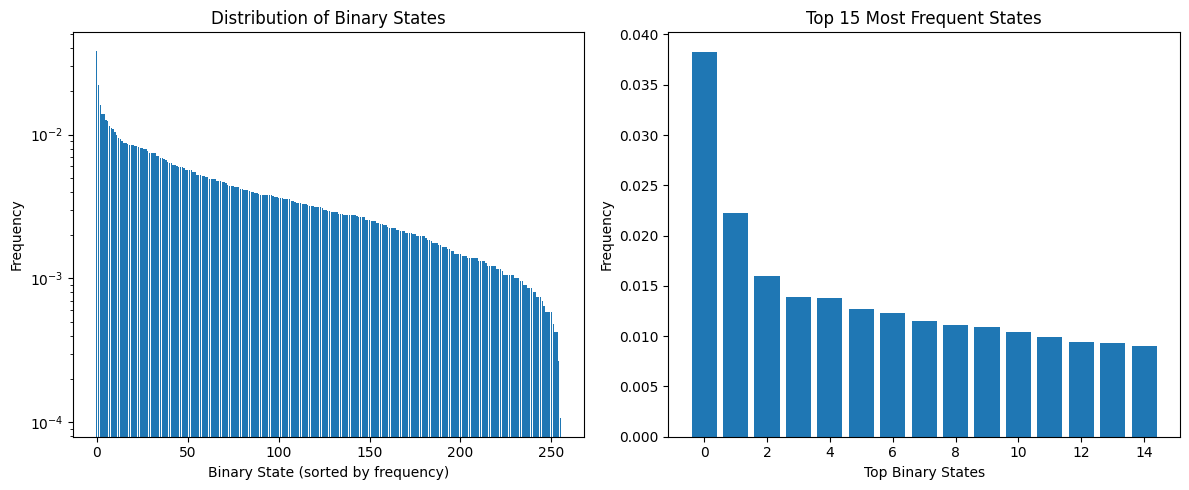

[((np.int32(0),
   np.int32(1),
   np.int32(0),
   np.int32(0),
   np.int32(0),
   np.int32(0),
   np.int32(0),
   np.int32(0)),
  0.03829787234042553),
 ((np.int32(0),
   np.int32(1),
   np.int32(0),
   np.int32(0),
   np.int32(0),
   np.int32(0),
   np.int32(0),
   np.int32(1)),
  0.022287234042553193),
 ((np.int32(0),
   np.int32(1),
   np.int32(1),
   np.int32(1),
   np.int32(0),
   np.int32(0),
   np.int32(0),
   np.int32(1)),
  0.015957446808510637),
 ((np.int32(1),
   np.int32(0),
   np.int32(0),
   np.int32(0),
   np.int32(1),
   np.int32(1),
   np.int32(1),
   np.int32(0)),
  0.013936170212765957),
 ((np.int32(0),
   np.int32(1),
   np.int32(1),
   np.int32(0),
   np.int32(0),
   np.int32(0),
   np.int32(0),
   np.int32(1)),
  0.013829787234042552),
 ((np.int32(0),
   np.int32(1),
   np.int32(0),
   np.int32(0),
   np.int32(1),
   np.int32(0),
   np.int32(0),
   np.int32(0)),
  0.012712765957446808),
 ((np.int32(1),
   np.int32(0),
   np.int32(1),
   np.int32(0),
   np.int32(0

In [63]:
analyze_binary_frequencies(get_binary_latent_frequencies(my_model, val_loader), top_k=15)